In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ls ../dataset/multicam/odometry*

'../dataset/multicam/odometry_Car1(Clone)-(-335458).json'
'../dataset/multicam/odometry_Car1(Clone)-(-346378).json'


In [3]:
ls ../dataset/multicam/detections*

'../dataset/multicam/detections_Car1(Clone)-(-335458).json'
'../dataset/multicam/detections_Car1(Clone)-(-346378).json'


In [4]:
odom_file_paths = [
    '../dataset/multicam/odometry_Car1(Clone)-(-335458).json',
    '../dataset/multicam/odometry_Car1(Clone)-(-346378).json'
]

dets_file_paths = [
    '../dataset/multicam/detections_Car1(Clone)-(-335458).json',
    '../dataset/multicam/detections_Car1(Clone)-(-346378).json'
]

In [5]:
class DynamicObject:
    def __init__(self):
        self.name = ""
        self.odom = None # odometry data
        self.poses = [[0], [0], [0]] # [X, Y, Z]
        self.vels = [[0], [0], [0]] # [Vx, Vy, Vz]
        
        self.dets = None # detections data
        
    def parse_odom(self):
        X = []; Y = []; Z = []
        Vx = []; Vy = []; Vz = []
        for i in range(len(self.odom)):
            x = float(self.odom[i]['pose_m'].split(',')[0][1:]);  X.append(x)
            y = float(self.odom[i]['pose_m'].split(',')[1]);      Y.append(y)
            z = float(self.odom[i]['pose_m'].split(',')[-1][:-1]);Z.append(z)

            vx = float(self.odom[i]['vel_m_sec'].split(',')[0][1:]);  Vx.append(vx)
            vy = float(self.odom[i]['vel_m_sec'].split(',')[1]);      Vy.append(vy)
            vz = float(self.odom[i]['vel_m_sec'].split(',')[-1][:-1]);Vz.append(vz)
        self.poses = [X, Y, Z]
        self.vels = [Vx, Vy, Vz]

In [6]:
cars = []
for odom_path, dets_path in zip(odom_file_paths, dets_file_paths):
    with open(odom_path) as json_odom:
        odom_data = json.load(json_odom)
    with open(dets_path) as json_dets:
        dets_data = json.load(json_dets)
    car = DynamicObject()
    car.odom = odom_data
    car.parse_odom()
    car.dets = dets_data
    
    cars.append(car)

In [7]:
cars[0].odom[:2]

[{'frame_number': 1,
  'pose_m': '(61.1, 343.6, -290.0)',
  'vel_m_sec': '(-1.2, 0.0, 4.2)',
  'acc_m_sec_sec': '(-0.6, 0.0, 2.8)',
  'orient_quat': '(0.0, -0.1, 0.0, 1.0)',
  'ang_vel_deg_sec': '(0.1, 0.4, 0.0)',
  'ang_acc_deg_sec_sec': '(0.2, 2.9, -0.2)'},
 {'frame_number': 2,
  'pose_m': '(60.5, 343.6, -287.6)',
  'vel_m_sec': '(-1.4, 0.0, 5.4)',
  'acc_m_sec_sec': '(-0.9, 0.0, 3.9)',
  'orient_quat': '(0.0, -0.1, 0.0, 1.0)',
  'ang_vel_deg_sec': '(0.2, 1.1, 0.2)',
  'ang_acc_deg_sec_sec': '(0.7, 1.2, 0.6)'}]

In [8]:
cars[0].dets[:2]

[{'frame_number': 1,
  'tags': 'TrafficCar, TrafficCar, TrafficCar, TrafficCar, TrafficCar',
  'poses_m': '(61.4, 341.6, -291.0), (74.9, 341.6, -255.0), (66.4, 341.6, -310.9), (72.3, 341.6, -334.7), (49.7, 341.6, -247.0)',
  'orients_quat': '(0.0, -0.1, 0.0, 1.0), (0.0, -0.8, 0.0, 0.6), (0.0, -0.1, 0.0, 1.0), (0.0, -0.1, 0.0, 1.0), (0.0, -0.1, 0.0, 1.0)',
  'bbox_sizes_m': '(2.3, 1.9, 6.0), (2.3, 1.9, 6.0), (2.3, 1.9, 6.0), (2.3, 1.9, 6.0), (2.3, 1.9, 6.0)'},
 {'frame_number': 2,
  'tags': 'TrafficCar, TrafficCar, TrafficCar, TrafficCar, TrafficCar',
  'poses_m': '(60.8, 341.6, -288.6), (72.5, 341.6, -255.6), (65.8, 341.6, -308.5), (72.1, 341.6, -334.0), (49.6, 341.6, -246.4)',
  'orients_quat': '(0.0, -0.1, 0.0, 1.0), (0.0, -0.8, 0.0, 0.6), (0.0, -0.1, 0.0, 1.0), (0.0, -0.1, 0.0, 1.0), (0.0, -0.1, 0.0, 1.0)',
  'bbox_sizes_m': '(2.3, 1.9, 6.0), (2.3, 1.9, 6.0), (2.3, 1.9, 6.0), (2.3, 1.9, 6.0), (2.3, 1.9, 6.0)'}]

In [9]:
print('Total amount of dynamic objects in the scene: ', len(cars))

Total amount of dynamic objects in the scene:  2


### Plot results

Take into account that Unity has the following rigid body coordinate system,
[reference](https://docs.nvidia.com/isaac/isaac/doc/simulation/unity3d.html#coordinates):
- X - right
- Y - up
- Z - forward

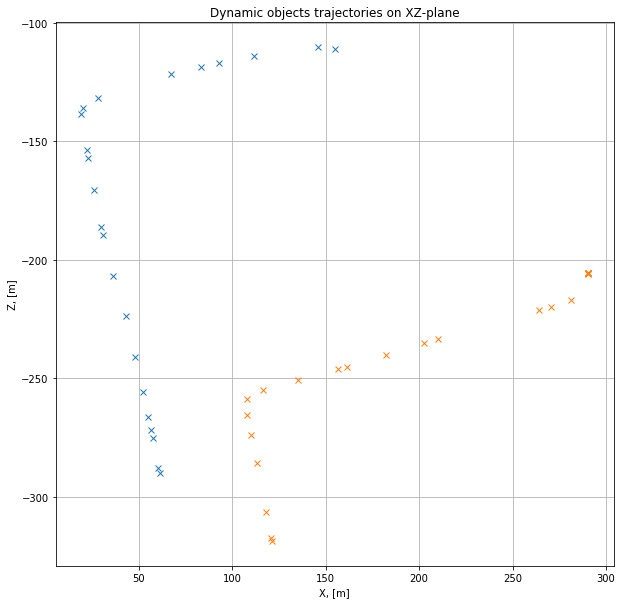

In [10]:
plt.figure(figsize=(10,10))
plt.title('Dynamic objects trajectories on XZ-plane')
plt.grid()
plt.xlabel('X, [m]')
plt.ylabel('Z, [m]')

for car in cars:
    X = car.poses[0]; Z = car.poses[2]
    plt.plot(X,Z, 'x')
    
plt.show();

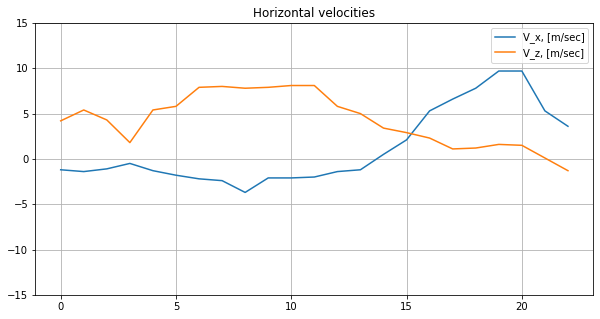

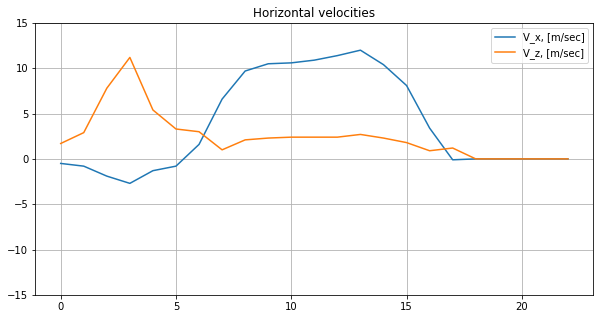

In [11]:
for car in cars:
    plt.figure(figsize=(10,5))
    plt.title('Horizontal velocities')
    Vx = car.vels[0]; Vz = car.vels[2]
    plt.plot(Vx, label='V_x, [m/sec]')
    plt.plot(Vz, label='V_z, [m/sec]')
    plt.legend()
    plt.grid()
    plt.ylim([-15, 15]);

## Create formated dataset

In [13]:
import os
import cv2

In [9]:
object_names = [
    'Car1(Clone)-(-335458)',
    'Car1(Clone)-(-346378)'
]

In [65]:
class MulticamDataset:
    
    def __init__(self, data_path, object_names):
        files = os.listdir(data_path)
        self.image_files = []
        for file in files:
            if file.endswith('.png'):
                self.image_files.append(os.path.join(data_path, file))

        self.odom_files =[]; self.dets_files =[]
        for name in object_names:
            odom_filename = 'odometry_{}.json'.format(name)
            odom_file = os.path.join(data_path, odom_filename)
            self.odom_files.append(odom_file)

            dets_filename = 'detections_{}.json'.format(name)
            dets_file = os.path.join(data_path, dets_filename)
            self.dets_files.append(dets_file)
        
        self.odoms = [self.parse_odom(file) for file in self.odom_files]
        self.dets = [self.parse_dets(file) for file in self.dets_files]
        
        # parameters
        self.fov = {'horizontal': 70., 'vertical': 40.} # camera FOV, degrees
        self.R_lookup = 50.0 # [m]
        
    def parse_odom(self, odom_file):
        # check if odometry file exists
        assert os.path.isfile(odom_file)
        
        with open(odom_file) as json_data:
            odom_raw = json.load(json_data)
        odom = odom_raw
        for i in range(len(odom_raw)):
            pose = np.array( odom_raw[i]['pose_m'][1:-1].split(',') ).astype(np.float)
            odom[i]['pose_m'] = pose

            vel  = np.array( odom_raw[i]['vel_m_sec'][1:-1].split(',') ).astype(np.float)
            odom[i]['vel_m_sec'] = vel

            acc  = np.array( odom_raw[i]['acc_m_sec_sec'][1:-1].split(',') ).astype(np.float)
            odom[i]['acc_m_sec_sec'] = acc

            orient_quat  = np.array( odom_raw[i]['orient_quat'][1:-1].split(',') ).astype(np.float)
            odom[i]['orient_quat'] = orient_quat

            ang_vel_deg_sec  = np.array( odom_raw[i]['ang_vel_deg_sec'][1:-1].split(',') ).astype(np.float)
            odom[i]['ang_vel_deg_sec'] = ang_vel_deg_sec

            ang_acc_deg_sec_sec  = np.array( odom_raw[i]['ang_acc_deg_sec_sec'][1:-1].split(',') ).astype(np.float)
            odom[i]['ang_acc_deg_sec_sec'] = ang_acc_deg_sec_sec
        return odom
    
    def parse_dets(self, dets_file):
        # check if detections file exists
        assert os.path.isfile(dets_file)
        
        with open(dets_file) as json_data:
            dets_raw = json.load(json_data)
        dets = dets_raw
        for i in range(len(dets_raw)):
            tags1 = dets_raw[i]['tags'].split(', ')
            dets[i]['tags'] = tags1

            poses1 = dets_raw[i]['poses_m'][1:-1].split('), (')
            poses1 = [np.array(p.split(',')).astype(np.float) for p in poses1]
            dets[i]['poses_m'] = poses1

            bbox_sizes1 = dets_raw[i]['bbox_sizes_m'][1:-1].split('), (')
            bbox_sizes1 = [np.array(p.split(',')).astype(np.float) for p in bbox_sizes1]
            dets[i]['bbox_sizes_m'] = bbox_sizes1

            orients_quat1 = dets_raw[i]['orients_quat'][1:-1].split('), (')
            orients_quat1 = [np.array(p.split(',')).astype(np.float) for p in orients_quat1]
            dets[i]['orients_quat'] = orients_quat1
        return dets
    
    def __getitem__(self, i):
        assert len(self.image_files) > 0
        # read image
        image = cv2.imread(self.image_files[0][:-10]+str(i+1)+'_img.png')
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        output = None
        return image, output
    
    def __len__(self):
        return len(self.image_files)

In [66]:
data_path = '../dataset/multicam/'
dataset = MulticamDataset(data_path, object_names)